# Modeling

* [1. Dimensionality reduction](#1)
    * [1.1 Correlations](#1.1)
    * [1.2 Logistic Regression with L1 penalty](#1.2)
    * [1.3 Principal Component Analysis (PCA)](#1.3)
* [2. Random Forest Classifier](#2)
* [3. Extreme Gradient Boosting Classifier](#3)
* [4. Classification with Neural Network](#4)
* [5. Summary](#5)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl # colors
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from datetime import datetime as dt
import pickle

plt.rcParams['axes.grid'] = True
plt.rcParams['axes.axisbelow'] = True
plt.rcParams['axes.xmargin'] = 0.02
plt.rcParams['axes.ymargin'] = 0.1
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True

In [2]:
df = pd.read_csv("./data/work_final_4modeling.csv",index_col='ID',low_memory=False)
dp = pd.read_csv("./data/pred_final_4modeling.csv",index_col='ID',low_memory=False)

df.shape,dp.shape

((145231, 1908), (145232, 1908))

In [3]:
y = pd.read_csv("./data/work_target.csv",index_col='ID',low_memory=False)
y.shape

(145231, 1)

## 1. Dimensionality reduction<a id='1'></a>

### 1.1 Correlations<a id='1.1'></a>

Let's plot the covariance matrix:

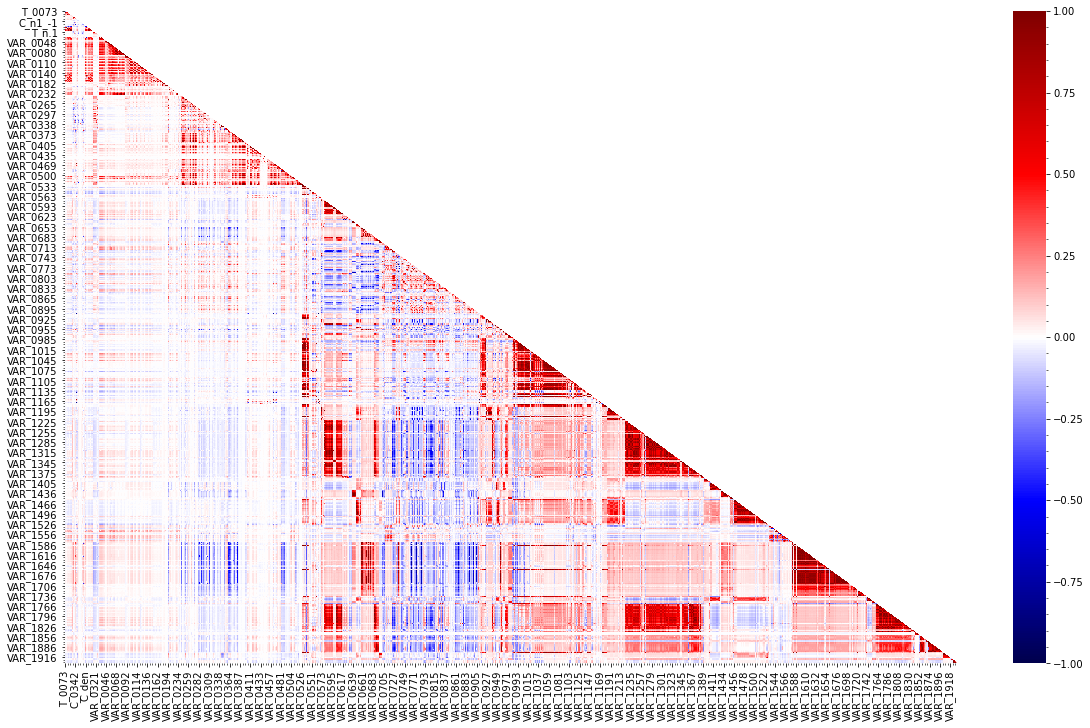

In [4]:
cm = df.corr()

f, ax = plt.subplots(figsize=(20, 12))

mask = np.triu(np.ones_like(cm, dtype=bool))

sns.heatmap(cm,mask=mask,cmap='seismic',center=0,vmin=-1.,vmax=1)

and the histogram of Pearson coefficients (no double counting, no diagonal)

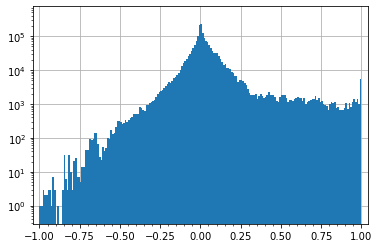

In [8]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.hist(cm.values[mask].ravel(),bins=200,log=True);

And cumulative, read from the end:

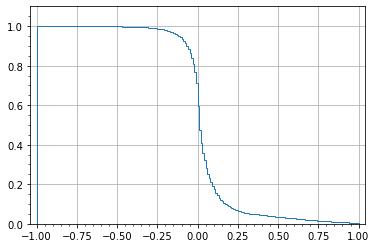

In [9]:
fig, ax = plt.subplots(1,1,figsize=(6,4))

ax.hist(cm.values[mask].ravel(),bins=200,density=True, histtype='step', cumulative=-1);

No correlations taken into account, and minimal improvement. Requiring Pearson <0.5 would remove only 5% of columns. Not good.

### 1.2 Logistic Regression with L1 penalty<a id='1.2'></a>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=123)

# only liblinear/saga work for l1
# l1 ~= LASSO (l1 good for OLS and MLL, LASSO originally for OLS only

m = LogisticRegression(penalty='l1',solver='saga',max_iter=1000,random_state=123)

m.fit(X_train,y_train)
y_pred = m.predict(X_test)

### 1.3 Principal Component Analysis<a id='1.3'></a>

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA().fit(X_scaled)

In [ ]:
plt.figure(figsize=(20, 5))

n_comp = len(pca.explained_variance_ratio_)
#n_comp = 320

plt.plot(pca.explained_variance_ratio_[:n_comp].cumsum())

plt.xticks(np.arange(0, n_comp, 50))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.ylim((0.,1.05))
plt.xlabel('Component #'); plt.ylabel('Cumulative ratio variance');

## 2. Random Forest Classifier<a id='2'></a>

## 3. Extreme Gradient Boosting Classifier<a id='3'></a>

## 4. Classification with Neural Network<a id='4'></a>

## 5. Summary<a id='5'></a>